# Paul M Girdler
# Akhila D Devabhaktuni

# Part 3: 
### Twitter Application Development
# Section 3 
## Gather Twitter data, Plot twitter flu heatmap
# Section 4
## Now compare your map and with map from CDC for the same date ranges. You can do that side by side in a Jupyter notebook by running the respective R commands. 

In [9]:
install.packages("ggmap")

also installing the dependencies ‘RgoogleMaps’, ‘png’, ‘rjson’, ‘jpeg’, ‘bitops’

Warning message in install.packages("ggmap"):
“installation of package ‘png’ had non-zero exit status”Warning message in install.packages("ggmap"):
“installation of package ‘rjson’ had non-zero exit status”Warning message in install.packages("ggmap"):
“installation of package ‘jpeg’ had non-zero exit status”Warning message in install.packages("ggmap"):
“installation of package ‘bitops’ had non-zero exit status”Warning message in install.packages("ggmap"):
“installation of package ‘RgoogleMaps’ had non-zero exit status”Warning message in install.packages("ggmap"):
“installation of package ‘ggmap’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
## Libraries used
#install.packages("usmap")
#library(devtools)
#library(rtweet)
library(maps)
#library(maptools)
library(tidyverse)
#library(rgdal)
#library(viridis)
library(usmap)
library(ggplot2)
#library(ggmap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::map()    masks maps::map()


# Twitter data mining and cleaning code

# Discussion
Tweets were collected using the rtweet package (which is recommended now by TwitteR package as there package is no longer being supported. The total number of relevant tweets collected over the period, from February 12th to March 5th was 29,352.

Tweets were collected using relevant hashtags, and relevant keywords. The tweets were filtered out to only include tweets from continental USA. The complete list of hashtags and keywords can be found in the code above. Only the data that yielded practical results were included. The heatmaps corresponding to this twitter data can be found below, included the corresponding hashtags and/or search terms.

Please note the state labels were left on intentionally as we are both international students, and hence we require the state labels for ease of analysis.

In [12]:
## Function to plot dataframe with state and no of tweets data
plot_tweet_density <- function(df_state_cont){
  ## Assign labels FALSE to deactivate state labels
  plot_usmap(data = df_state_cont, values = "freq", lines = "red", labels = TRUE) + 
    scale_fill_continuous(name = "Density of Tweets collected", label = scales::comma)  +
    scale_fill_gradient2(low = "#3f0101" , mid = "#d82222", high = "#04f20c" , midpoint = 2.5)+ 
    theme(legend.position = "right")+
    labs(title = "Density of tweets collected")  + 
  theme(plot.title = element_text(face="bold", size = 14)) 
}

In [2]:
il_count = rbind(read.csv(file = "il_count.csv",header = TRUE),read.csv(file = "il_now_count.csv",header = TRUE))

In [3]:
influ_count = rbind(read.csv(file="influ_count.csv",header = TRUE),read.csv(file="influ2_count.csv",header = TRUE),
                  read.csv(file="influ_now_count.csv",header = TRUE))

In [4]:
tweet_count = read.csv("tweet_count.csv",header = TRUE)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


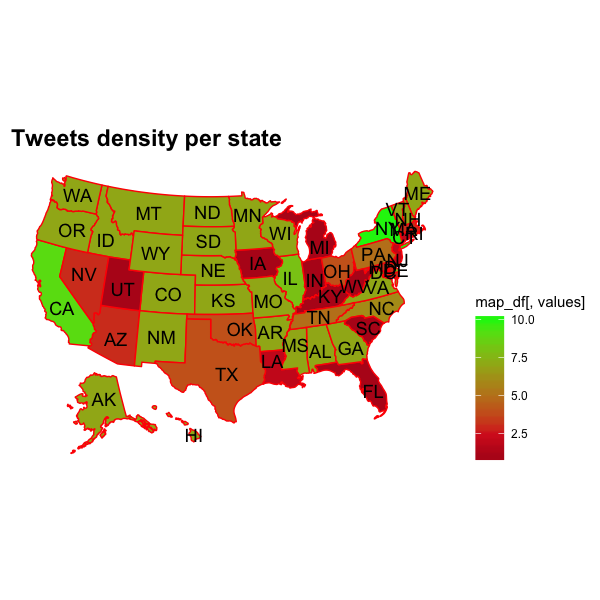

In [21]:
options(repr.plot.width=5, repr.plot.height=5)
par(mfrow = c(1,2),fig=c(0.8,1,0.8,1))
plot_usmap(data = tweet_count, values = "freq", lines = "red", labels = TRUE) + 
    scale_fill_continuous(name = "Density of Tweets collected", label = scales::comma)  +
    scale_fill_gradient2(low = "#3f0101" , mid = "#d82222", high = "#04f20c" , midpoint = 2.5)+ 
    theme(legend.position = "right")+
    labs(title = "Tweets density per state")  + 
  theme(plot.title = element_text(face="bold", size = 14)) 

Tweets collected for all the keywords

# Discussion
Generally, the southern states had the highest levels of flu activity during the period. However, the twitter density in this states were only moderate. CA and NY had the highest density of tweets. CA and NY, however, had above average levels of flu activity. 

In [6]:
tweet_count = read.csv("tweet_count.csv",header = TRUE)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


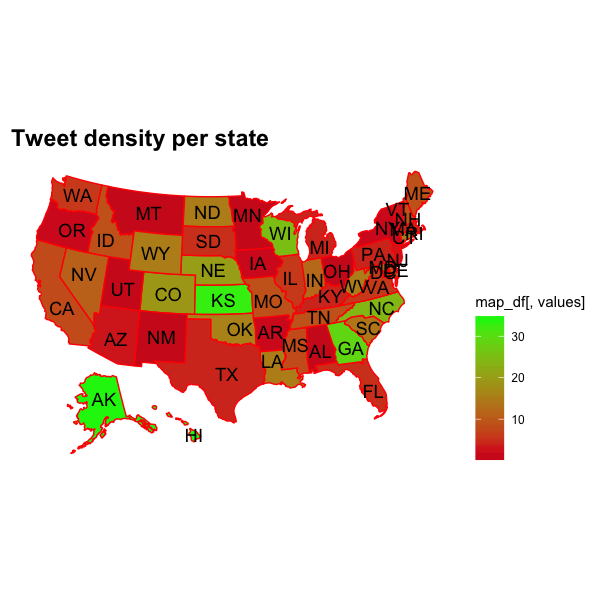

In [7]:
plot_usmap(data = influ_count, values = "freq", lines = "red", labels = TRUE) + 
    scale_fill_continuous(name = "Tweets collected for '#Influenze' (12th Feb - 5th March)", label = scales::comma)  +
    scale_fill_gradient2(low = "#3f0101" , mid = "#d82222", high = "#04f20c" , midpoint = 2.5)+ 
    theme(legend.position = "right")+
    labs(title = "Tweet density per state")  + 
  theme(plot.title = element_text(face="bold", size = 14)) 

Tweet query #influenza, "Influenza" in USA

# Discussion
Generally, the southern states had the highest levels of flu activity during the period. The twitter density in this states were low. KS had the highest density of tweets. KS did in fact have high levels of flu activity. Largely, however, there does not appear to be any obvious correlation between the graphs.


In [8]:
sick_count = rbind(read.csv(file="sicold_count.csv",header = TRUE),read.csv(file="sick_count.csv",header = TRUE))

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


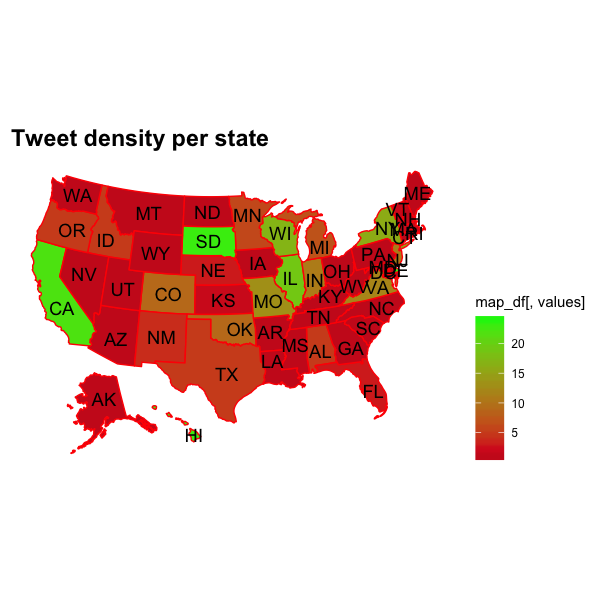

In [9]:
plot_usmap(data = sick_count, values = "freq", lines = "red", labels = TRUE) + 
    scale_fill_continuous(name = "Tweets collected for '#Influenze' (12th Feb - 5th March)", label = scales::comma)  +
    scale_fill_gradient2(low = "#3f0101" , mid = "#d82222", high = "#04f20c" , midpoint = 2.5)+ 
    theme(legend.position = "right")+
    labs(title = "Tweet density per state")  + 
  theme(plot.title = element_text(face="bold", size = 14)) 

Tweet query #sick+#cold, "Sick and Cold" in USA
# Discussion
Generally, the southern states had the highest levels of flu activity during the period. The twitter density in this states were low. SD had the highest density of tweets. SD, however, actually had low levels of flu activity. CA also had the second highest density of tweets. CA, however, had moderate levels of flu activity. Largely, however, there does not appear to be any obvious correlation between the graphs.

In [10]:
vir_count = read.csv("vir_count.csv",header=TRUE)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


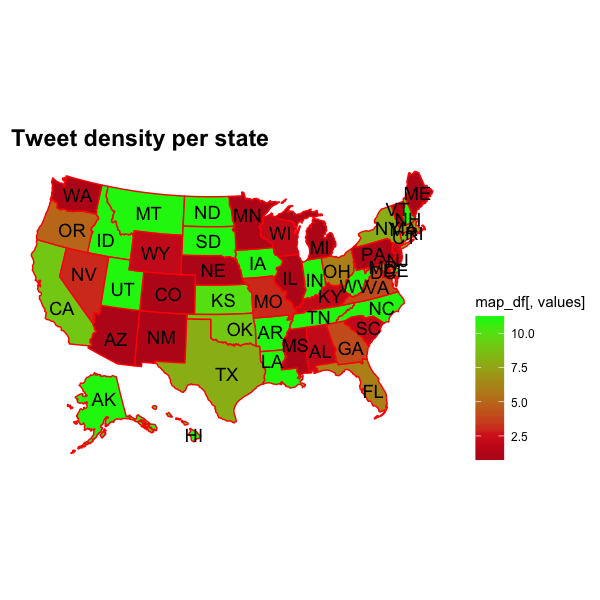

In [11]:
plot_usmap(data = vir_count, values = "freq", lines = "red", labels = TRUE) + 
    scale_fill_continuous(name = "Tweets collected for '#Influenze' (12th Feb - 5th March)", label = scales::comma)  +
    scale_fill_gradient2(low = "#3f0101" , mid = "#d82222", high = "#04f20c" , midpoint = 2.5)+ 
    theme(legend.position = "right")+
    labs(title = "Tweet density per state")  + 
  theme(plot.title = element_text(face="bold", size = 14)) 

Tweet query #viral, "Viral flu" in USA
# Discussion
Generally, the southern states had the highest levels of flu activity during the period. The twitter density in this states were a mixture of high and low. Largely, however, there does not appear to be any obvious correlation between the graphs.

In [15]:
cdc_flu <- read.csv("StateDatabyFebMar19(1).csv", header = TRUE)

In [16]:
names(cdc_flu) <- c("state", "URL", "WEBSITE","ACTIVITY.LEVEL","ACTIVITY.LEVEL.LABEL","WEEKEND" ,"WEEK","SEASON")

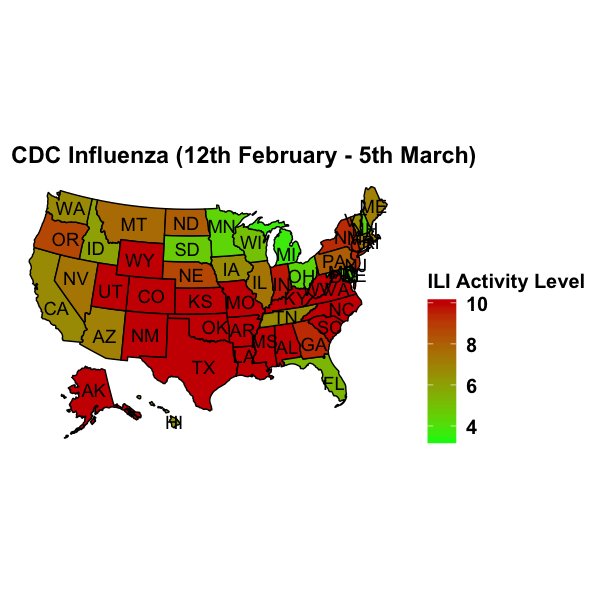

In [17]:

plot_usmap(data = cdc_flu, values = "ACTIVITY.LEVEL", lines = "black", labels = TRUE) + 
  scale_fill_continuous(low = "#04f20c", high = "#cc0000",name = "ILI Activity Level", label = scales::comma) + 
  theme(legend.position = "right") +
  labs(title = "CDC Influenza (12th February - 5th March)") + 
  theme(plot.title = element_text(face="bold", size = 14)) +
  theme(legend.title = element_text(face="bold", size = 12)) +
  theme(legend.text = element_text(face="bold", size = 12))
